Лабораторная работа №5
Возможности библиотеки NetworkX
Болотов М.В. АСУ4-22-1м

In [2]:
import json                                               # Импорт необходимых библиотек
import requests
import networkx
import numpy as np                                        
import networkx as nx                                     
import matplotlib.pyplot as plt

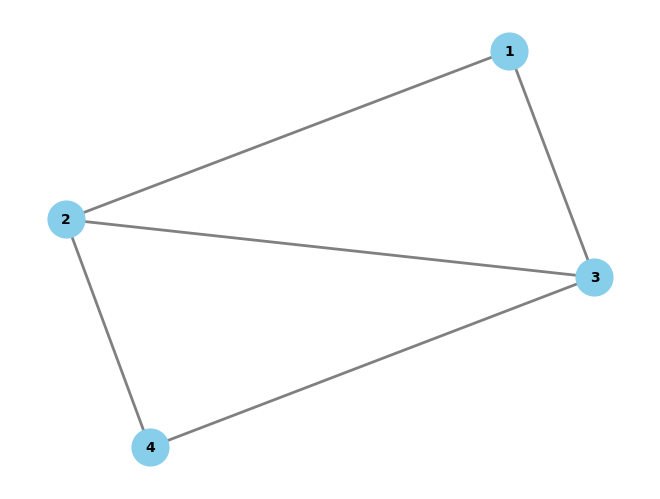

In [3]:
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]          # Задание списка рёбер

G = nx.Graph()                                            # Создание пустого графа

G.add_edges_from(edges)                                   # Добавление рёбер в граф
                                                             
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, width=2, edge_color='gray')  # Визуализация графа

plt.show()                                                # Отображение графа

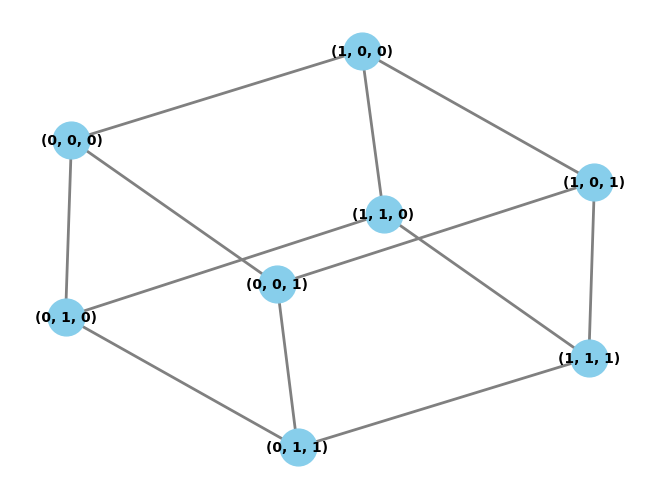


Базисные циклы в графе куба:
[(1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1)]
[(0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 1)]
[(1, 0, 0), (0, 0, 0), (0, 1, 0), (1, 1, 0)]
[(0, 0, 1), (0, 0, 0), (0, 1, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1)]
[(0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)]

Все циклы в ориентированном графе:
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0)]
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (0, 0, 0), (0, 0, 1)]
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1)]
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1)]
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0)]
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (0, 1, 0), (0, 0, 0), (0, 0, 1)]
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (0, 1, 0), (0, 0, 0), (1, 0, 0)]
[(1, 0, 1), (1, 1, 1)]
[(1, 0, 1), (1, 1, 1), (0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0)]
[(1, 0, 1), (1, 1, 1), (0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0), (0, 0, 0), (0, 0, 1)]
[(1, 0, 1), (1, 1

In [4]:
G = nx.hypercube_graph(3)                                       # Создание графа куба размерности 3

nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, width=2, edge_color='gray')  # Визуализация графа куба
plt.show()

cycle_basis = nx.cycle_basis(G)                                 # Поиск базисных циклов
print("\nБазисные циклы в графе куба:")
for cycle in cycle_basis:
    print(cycle)

D = nx.DiGraph(G)                                               # Создание ориентированного графа с двумя ориентациями для каждого ребра

cycles = list(nx.simple_cycles(D))                              # Поиск циклов в ориентированном графе
print("\nВсе циклы в ориентированном графе:")
for cycle in cycles:
    print(cycle)

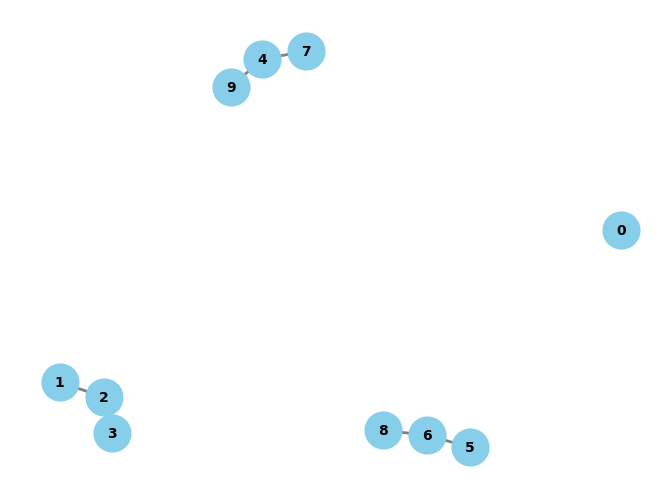

In [5]:
n = 10                                                          # Задаем количество вершин

p = 0.1                                                         # Задаем вероятность соединения

G = nx.erdos_renyi_graph(n, p)                                  # Создаем случайный граф с заданными параметрами

nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, width=2, edge_color='gray')
plt.show()                                                      # Визуализация графа

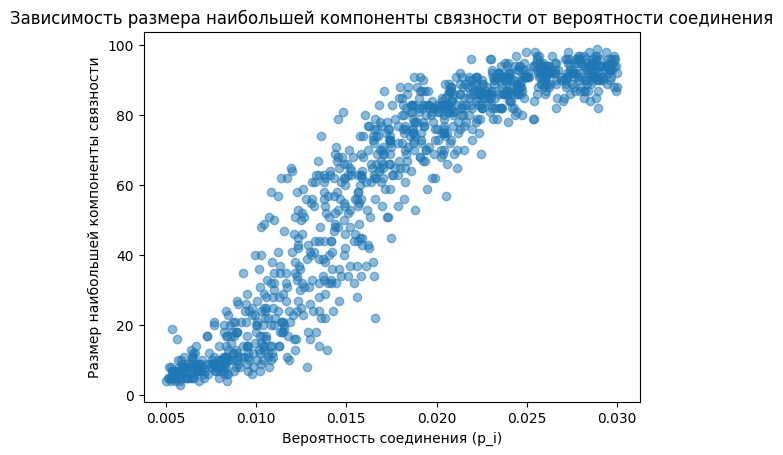

In [6]:
num_graphs = 1000                                                # Задаем параметры
num_nodes = 100

probabilities = []                                               # Создаем пустые списки для хранения данных
largest_component_sizes = []

for _ in range(num_graphs):                                      # Цикл по созданию случайных графов
    p_i = np.random.uniform(0.005, 0.03)                         # Генерируем случайную вероятность в интервале (0.005, 0.03)
    
    G = nx.erdos_renyi_graph(num_nodes, p_i)                     # Создаем случайный граф
    
    largest_component_size = len(max(nx.connected_components(G), key=len))   # Находим размер наибольшей компоненты связности
    
    probabilities.append(p_i)                                    # Сохраняем данные
    largest_component_sizes.append(largest_component_size)

plt.scatter(probabilities, largest_component_sizes, alpha=0.5)   # Наносим точки на график
plt.title('Зависимость размера наибольшей компоненты связности от вероятности соединения')
plt.xlabel('Вероятность соединения (p_i)')
plt.ylabel('Размер наибольшей компоненты связности')
plt.show()

Переделка с Хабра 
https://habr.com/ru/articles/263313/

In [16]:
def getVKMembers(group_id, count=1000, offset=0):
    host = 'http://api.vk.com/method'                                                                    # http://vk.com/dev/groups.getMembers
    if count > 1000:
        raise Exception('Bad params: max of count = 1000')
    response = requests.get('{host}/groups.getMembers?group_id={group_id}&count={count}&offset={offset}'
                            .format(host=host, group_id=group_id, count=count, offset=offset))
    if not response.ok:
        raise Exception('Bad response code')
    return response.json()

def allCountOffset(func, func_id):
    set_members_id = set()
    count_members = -1
    offset = 0
    while count_members != len(set_members_id):                                                          # Возможен бесконечный цикл для реального VK API
        response = func(func_id, offset=offset).get('response', {})                                      # Добавлен get для избежания KeyError ниже также
        if count_members != response.get('count', -1):                                                  
            count_members = response.get('count', -1)  
        new_members_id = response.get('users', [])  
        offset += len(new_members_id)
        if set_members_id | set(new_members_id) == set_members_id != set():                              # without new members
            print('WARNING: break loop', count_members, len(set_members_id))                             # Добавлены скобки для print (изначально написано на 2 версии)
            break
        set_members_id = set_members_id.union(new_members_id)

    return set_members_id

groups = ['https://vk.com/asu_tp',                                                                       # Группы АСУТП
'https://vk.com/club50485994',
'https://vk.com/asutp_ru',
'https://vk.com/notes_asutp',
'https://vk.com/club8387461',
'https://vk.com/acytp',
'https://vk.com/asunews',
'https://vk.com/controlsys',
'https://vk.com/big_asu',
'https://vk.com/thecode.media',
'https://vk.com/itcookies',
'https://vk.com/russian_automation',
'https://vk.com/mti_gk',
'https://vk.com/clubengel',
'https://vk.com/industriation',
'https://vk.com/python_macros',
'https://vk.com/po_owen',
'https://vk.com/industrial.automation.experts',
'https://vk.com/automation_minsk',
'https://vk.com/club15044854',
'https://vk.com/npo_r2']

members = {}
for g in groups:
    name = g.split('https://vk.com/')[1]
    print(name)
    members[name] = allCountOffset(getVKMembers, name)
     
matrix = {}                                                                                             # Создание матрицы схожести
for i in members:
    for j in members:
        if i != j:
            intersection_size = len(members[i] & members[j])
            union_size = max(len(members[i]), len(members[j]))
             
            similarity = intersection_size / union_size if union_size != 0 else 0.0                     # Проверка на деление на ноль
            
            matrix[i + j] = similarity

max_matrix = max(matrix.values())                                                                       # Нормализация значений в матрице
min_matrix = min(matrix.values())

for i in matrix:
    matrix[i] = (matrix[i] - min_matrix) / (max_matrix - min_matrix)

g = networkx.Graph(directed=False)                                                                      # Визуализация графа
for i in members:
    for j in members:
        if i != j:
            g.add_edge(i, j, weight=matrix[i + j])

members_count = {x: len(members[x]) for x in members}

max_value = max(members_count.values()) * 1.0
size = []
max_size = 900
min_size = 100
for node in g.nodes():
    size.append(((members_count[node] / max_value) * max_size + min_size) * 10)

import matplotlib.pyplot as plt
pos=networkx.spring_layout(g)
plt.figure(figsize=(20,20))
networkx.draw_networkx(g, pos, node_size=size, width=0.5, font_size=8)
plt.axis('off')
plt.show()

asu_tp


ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, 'Программа на вашем хост-компьютере разорвала установленное подключение', None, 10053, None))